In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

**Hi Khawlah and Reem, you both did great projects today.  I wanted you both to have the official name/concept for what technique you used to make the custom classifier / feature engineering.  It was basically a flavor of cosine similarity measure with the centroid of the class distribution.  I can explain it in person and write it out on the board with vectors on Sunday.**

In [51]:
#import the mnist data
df=pd.read_csv('mnist_train.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#get the centroid vectors
num_means=df.groupby(0).mean().reset_index()
# get the L2 of the centroid vectors
lengths=((num_means**2).sum(axis=1))**0.5
lengths

0    2109.662035
1    1369.343144
2    1801.695465
3    1803.132022
4    1613.920316
5    1565.155798
6    1792.823092
7    1603.080422
8    1891.551252
9    1674.770050
dtype: float64

In [55]:
#L2 norm the centroid vectors
num_means_L2=(num_means.values[:,1:].T/lengths.values).T
num_means_L2.shape

(10, 784)

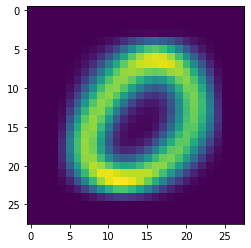

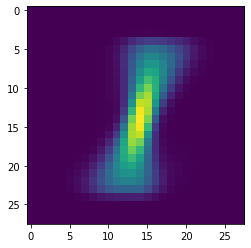

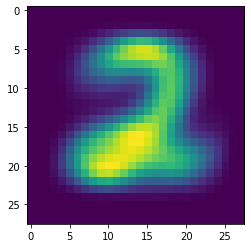

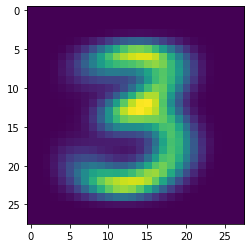

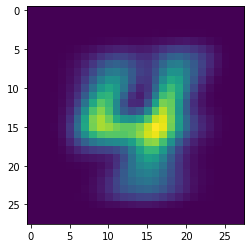

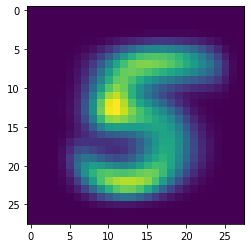

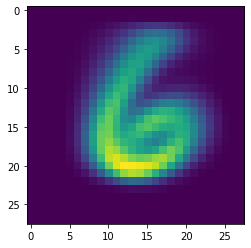

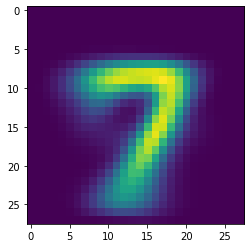

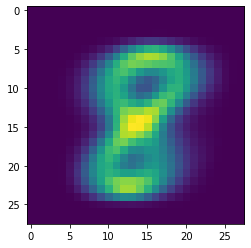

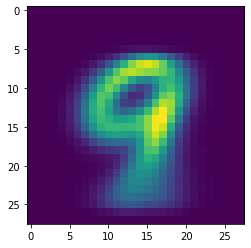

<Figure size 432x288 with 0 Axes>

In [56]:
#look at the L2 normed centroid vectors
pics=num_means_L2.reshape(10,28,28)
for i in range(10):
    plt.imshow(pics[i,:,:])
    plt.figure()

In [96]:
#L2 norm the data
labeled_data=df.values
y_actual=labeled_data[:,0]
data=labeled_data[:,1:]
data_L2=data/(data**2).sum(axis=1,keepdims=True)**0.5
data_L2.shape

(60000, 784)

In [93]:
num_means_L2.shape

(10, 784)

$$ \Large \hat{d}_i\cdot\hat{c}_j=\cos{\theta_{ij}}$$

In [97]:
#dot each row of the L2 normed data with the L2 normed centroids 
#this is the cosine similarity
data_dot=data_L2@num_means_L2.T
data_dot.shape

(60000, 10)

In [98]:
data_dot_df=pd.DataFrame(data_dot)
data_dot_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.592208,0.500464,0.580655,0.693741,0.479931,0.717677,0.574248,0.583149,0.647933,0.574187
1,0.857280,0.388608,0.552324,0.574623,0.483202,0.686141,0.576762,0.510298,0.578864,0.522703
2,0.338299,0.140559,0.367540,0.360011,0.510456,0.348367,0.371508,0.323024,0.351881,0.415726
3,0.335628,0.720165,0.572715,0.504110,0.433068,0.469513,0.399705,0.398648,0.622137,0.422028
4,0.478895,0.527738,0.516447,0.506814,0.734276,0.593883,0.535044,0.674224,0.637549,0.794459


$$ \Large d_{class} =argmax_j(\hat{d}\cdot\hat{c}_j)$$

In [99]:
#get max dot similarity
max_feat=data_dot_df.max(axis=1)
y_pred=((data_dot_df.apply(lambda row :row == max_feat, axis=0 ).values)@np.arange(10).reshape(-1,1)).reshape(-1)

In [100]:
y_actual,y_pred

(array([5, 0, 4, ..., 5, 6, 8]), array([5, 0, 4, ..., 5, 6, 8]))

In [90]:
(y_pred==y_actual).sum()/y_pred.shape[0]

0.8136166666666667

(10, -0.7)

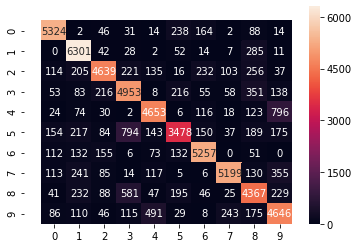

In [84]:
sns.heatmap(confusion_matrix(y_actual,y_pred), annot=True, fmt="d")
plt.xlim(-0.7, 10)
plt.ylim(10,-0.7)